<a href="https://colab.research.google.com/github/SruthiChilukuri/Master-Project/blob/master/Grayscale_segmentation(shining_unicorns).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Region-based segmentation**


Trying region-based segmentation on a women's apparel image that has been scraped from amazon(us) website.

-Tried to understand how image segmentation works

-Performed regional segmentation(gray scale transformation)

-analysed if it can anway contribute to our model that we are trying to build or if other segmenatation methologies should be explored.

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
from google.colab import files
uploaded = files.upload()

Saving amazon1.png to amazon1.png


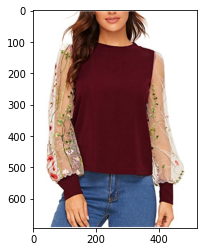

In [5]:

image = plt.imread('amazon1.png')
image.shape
plt.imshow(image)

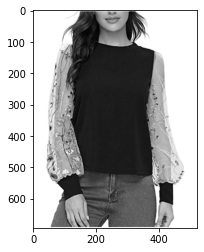

In [6]:
#converting the abobe RGB(3 channel) into a grayscale image; so that we can have a single channel
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [7]:
#now to perform segmentation; lets apply a certain treshold which can seprate the picture from the background.
#shape of the image
gray.shape

(693, 522)

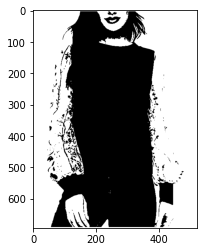

In [8]:
#taking the mean of the pixel values (693 is width and 522 is height of the image respectively) to create a treshold value
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')


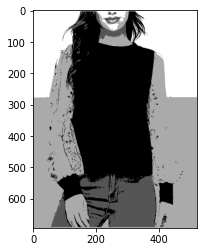

In [9]:
#it is understood from the above image that the white region is the background and the darker region is the apparel or the foreground.
#Now I will add multiple tresholds to check how it will reflect on our segmentation task; i.e. how the segments are being made.
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

As we observe; adding different tresholds has given better segments within the picture. The woman's top; trousers and sleeves have all been clearly segmented.

However; other methologies like using R-CNN or clustering are yet to be explored to see which one might work best.